<a href="https://colab.research.google.com/github/PiotrusWatson/level4project/blob/master/data/ipynbs/textual_entailment_snli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lets get the snli dataset baybee

In [33]:
!wget https://nlp.stanford.edu/projects/snli/snli_1.0.zip
!unzip snli_1.0.zip

--2020-01-21 15:24:56--  https://nlp.stanford.edu/projects/snli/snli_1.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94550081 (90M) [application/zip]
Saving to: ‘snli_1.0.zip.1’

snli_1.0.zip.1      100%[===================>]  90.17M  21.4MB/s    in 7.1s    

2020-01-21 15:25:03 (12.7 MB/s) - ‘snli_1.0.zip.1’ saved [94550081/94550081]

Archive:  snli_1.0.zip
replace snli_1.0/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [34]:
# Download the Glove.zip file and expand it.
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-01-21 15:53:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-21 15:53:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-21 15:53:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

KeyboardInterrupt: ignored

In [0]:
# Get the PolitiFact Dataset from the location provided in the DeClarE paper.
!wget http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/PolitiFact.zip
!unzip PolitiFact.zip

In [0]:
!git clone https://github.com/FakeNewsChallenge/fnc-1.git


In [0]:
# Get the Snopes Dataset from the location provided in the DeClarE paper.
!wget http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/Snopes.zip
!unzip Snopes.zip

Some imports lol :P

In [0]:
!pwd

In [0]:
import pandas as pd
import numpy as np

import torch,keras

from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.nn.parameter import Parameter
from torch.nn import init
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as data_utils

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import math

np.random.seed(128)

lets load this shit :^)

In [0]:
train_dataframe = pd.read_json('./snli_1.0/snli_1.0_train.jsonl', lines=True)
test_dataframe = pd.read_json('./snli_1.0/snli_1.0_test.jsonl', lines=True)


In [37]:
train_dataframe.head(50)

,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],3416050480.jpg#4,neutral,3416050480.jpg#4r1n,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,A person is training his horse for a competition.,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
1,[contradiction],3416050480.jpg#4,contradiction,3416050480.jpg#4r1c,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is at a diner, ordering an omelette.",( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
2,[entailment],3416050480.jpg#4,entailment,3416050480.jpg#4r1e,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is outdoors, on a horse.","( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
3,[neutral],2267923837.jpg#2,neutral,2267923837.jpg#2r1n,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,They are smiling at their parents,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...
4,[entailment],2267923837.jpg#2,entailment,2267923837.jpg#2r1e,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,There are children present,( There ( ( are children ) present ) ),(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...
5,[contradiction],2267923837.jpg#2,contradiction,2267923837.jpg#2r1c,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,The kids are frowning,( ( The kids ) ( are frowning ) ),(ROOT (S (NP (DT The) (NNS kids)) (VP (VBP are...
6,[contradiction],3691670743.jpg#0,contradiction,3691670743.jpg#0r1c,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy skates down the sidewalk.,( ( The boy ) ( ( ( skates down ) ( the sidewa...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ skate...
7,[entailment],3691670743.jpg#0,entailment,3691670743.jpg#0r1e,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy does a skateboarding trick.,( ( The boy ) ( ( does ( a ( skateboarding tri...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ does)...
8,[neutral],3691670743.jpg#0,neutral,3691670743.jpg#0r1n,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy is wearing safety equipment.,( ( The boy ) ( ( is ( wearing ( safety equipm...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ is) (...
9,[neutral],4804607632.jpg#0,neutral,4804607632.jpg#0r1n,An older man sits with his orange juice at a s...,( ( An ( older man ) ) ( ( ( sits ( with ( ( h...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...,An older man drinks his juice as he waits for ...,( ( An ( older man ) ) ( ( ( drinks ( his juic...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...


Helper functions: something that bulk converts things into lists, and a tokeniser that also pads and numpies things

In [38]:
def merge_bodies(articles, claims):
  merged = pd.merge(articles, claims, on="Body ID")
  mapping = {"disagree": 0, "discuss": 1, "unrelated": 2, "agree": 3}
  return merged.replace({"Stance": mapping})
  
  
train_articles = pd.read_csv("./fnc-1/train_bodies.csv")
train_claims = pd.read_csv("./fnc-1/train_stances.csv")
test_articles = pd.read_csv("./fnc-1/test_bodies.csv")
test_claims = pd.read_csv("./fnc-1/test_stances_unlabeled.csv")


train_challenge = merge_bodies(train_articles, train_claims)

test_challenge = merge_bodies(test_articles, test_claims)
train_challenge.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",2
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,2
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,2
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,2
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,2


also: lets load politifact :^^)

In [39]:
facts = pd.read_csv('./PolitiFact/politifact.tsv', delimiter = '\t', names = ['cred_label','claim_id','claim_text','claim_source','article','article_source'])
facts.head(50)
snopes = pd.read_csv("./Snopes/snopes.tsv", delimiter= "\t", names=['cred_label','claim_id','claim_text','article','article_source'])
politi_mapping = {"True": 1, "Half-True": 1, "Mostly True": 1, "Mostly False": 0, "False": 0, "Pants on Fire!": 0}
snopes_mapping = {"true": 1, "half-true": 1, "mostly true": 1, "mostly false": 0, "false": 0, "pants on fire!": 0}

def slice_snopes(unique):
  true_claims = unique[unique["cred_label"] == 1]
  false_claims = unique[unique["cred_label"] == 0]
  false_claims = false_claims.head(int(len(false_claims)/3))
  return pd.concat([true_claims, false_claims]).sample(frac=1)


def preprocess_fact_data(facts, mapping, slice_function=None):
  
  facts = facts.replace({"cred_label": mapping})
  unique = facts.drop_duplicates("claim_id")
  if (slice_function):
    unique = slice_function(unique)
  
#splitting the claims
  train_unique, test_unique = train_test_split(unique, test_size=0.2, random_state=8)

  

#recreating dataset
  test_facts = facts[facts["claim_id"].isin(test_unique["claim_id"])]
  train_facts = facts[facts["claim_id"].isin(train_unique["claim_id"])]
  return train_facts, test_facts
#get unique claims to divide dataset cleanly
train_facts, test_facts = preprocess_fact_data(facts, politi_mapping)
train_snopes, test_snopes = preprocess_fact_data(snopes, snopes_mapping, slice_snopes)

train_facts.head(500)

,cred_label,claim_id,claim_text,claim_source,article,article_source
0,1,2012_oct_08_barack-obama_obama-says-tax-code-r...,federal tax code loopholes giving incentives c...,barack obama,for firms moving overseas in order to create a...,foxnews.com
1,1,2012_oct_08_barack-obama_obama-says-tax-code-r...,federal tax code loopholes giving incentives c...,barack obama,get a tax break specifically by outsourcing jo...,newslines.org
2,1,2012_oct_08_barack-obama_obama-says-tax-code-r...,federal tax code loopholes giving incentives c...,barack obama,confusing clashes over taxes in wednesday s pr...,wsj.com
3,1,2012_oct_08_barack-obama_obama-says-tax-code-r...,federal tax code loopholes giving incentives c...,barack obama,support on this bill in a time of tight budget...,senate.gov
4,1,2012_oct_08_barack-obama_obama-says-tax-code-r...,federal tax code loopholes giving incentives c...,barack obama,tax a lower rate for american manufacturing an...,archives.gov
...,...,...,...,...,...,...
554,1,2017_jan_08_cory-booker_booker-mcconnell-full-...,2009 mitch mcconnell person thats saying hey g...,cory booker,to have a different standard the senate will h...,thedailybeast.com
555,1,2017_jan_08_cory-booker_booker-mcconnell-full-...,2009 mitch mcconnell person thats saying hey g...,cory booker,double standard for mcconnell to be less conce...,weaselzippers.us
556,1,2017_jan_08_cory-booker_booker-mcconnell-full-...,2009 mitch mcconnell person thats saying hey g...,cory booker,cory booker on government reform even billiona...,ontheissues.org
557,1,2017_feb_15_benjamin-netanyahu_benjamin-netany...,past weeks president donald trump pointed iran...,benjamin netanyahu,think are deeply committed to do and we are ob...,whitehouse.gov


In [40]:
test_facts.head(500)

,cred_label,claim_id,claim_text,claim_source,article,article_source
85,1,2014_aug_01_bruce-braley_iowa-senate-candidate...,says us senate candidate joni ernst not suppor...,bruce braley,morning new tv advertisement argues that posit...,desmoinesregister.com
86,1,2014_aug_01_bruce-braley_iowa-senate-candidate...,says us senate candidate joni ernst not suppor...,bruce braley,iowans could not support household on current ...,americanprogressaction.org
87,1,2014_aug_01_bruce-braley_iowa-senate-candidate...,says us senate candidate joni ernst not suppor...,bruce braley,not budged in five years leaving many falling ...,americanprogressaction.org
88,1,2014_aug_01_bruce-braley_iowa-senate-candidate...,says us senate candidate joni ernst not suppor...,bruce braley,are working to support themselves or their fam...,iowademocrats.org
89,1,2014_aug_01_bruce-braley_iowa-senate-candidate...,says us senate candidate joni ernst not suppor...,bruce braley,prove that i had those good hardworking skills...,iowademocrats.org
...,...,...,...,...,...,...
2766,0,2008_oct_02_joe-biden_mccain-refused-to-commit...,john mccain said wouldnt even sit government s...,joe biden,cap is melting palin im not one to attribute e...,mysinchew.com
2767,0,2008_oct_02_joe-biden_mccain-refused-to-commit...,john mccain said wouldnt even sit government s...,joe biden,control the weapons the theocracy does secreta...,blastmagazine.com
2768,0,2008_oct_02_joe-biden_mccain-refused-to-commit...,john mccain said wouldnt even sit government s...,joe biden,be left with only one conclusion mccain was co...,chrisweigant.com
2850,0,2009_may_19_mike-pence_120-million-deprived-he...,democrats propose health care plan deprive rou...,mike pence,speech politifact called claim false that demo...,democrats.org


In [0]:
def convert_to_lists(names_to_lists):
  for key in names_to_lists:
    names_to_lists[key] = names_to_lists[key].tolist()
  return names_to_lists

class Tokeniser:
  def __init__(self, texts, vocab_size, max_len):
    self.t = Tokenizer()
    self.max_len = max_len
    self.t.num_words = vocab_size
    
    full_corpus = []

    for index in texts:
      for text in texts[index]:
        full_corpus.append(text)
    
    self.t.fit_on_texts(full_corpus)

  def full_process(self, text):
    """OK SO: converts a list of strings into a list of numerical sequences
then pads them out so they're all a consistent size
then returns a numpy array of that :) """
    new_sequence = self.t.texts_to_sequences(text)
    #todo: modify to make it spit out a summarised version ABOUT HERE
    padded_sequence = pad_sequences(new_sequence, maxlen=self.max_len, padding ="post")
    return np.array(padded_sequence, dtype=np.float32)

  def do_everything(self, texts):
    for index in texts:
      texts[index] = self.full_process(texts[index])
    self.word_to_id = self.t.word_index
    return texts



  
# Get the embedding matrix using Glove. 
vocab,word2idx = None,{}

def load_glove_embeddings(path, word2idx, embedding_dim):
    """Loading the glove embeddings"""
    vocab_size = len(word2idx) + 1
    print(vocab_size)
    with open(path) as f:
        embeddings = np.zeros((vocab_size, embedding_dim))
        for line in f.readlines():
            values = line.split()
            word = values[0]
            index = word2idx.get(word)
            if index:
                vector = np.array(values[1:], dtype='float32')
                if vector.shape[-1] != embedding_dim:
                    raise Exception('Dimension not matching.')
                embeddings[index] = vector
        return torch.from_numpy(embeddings).float()

#assumption: we're going to only care about classification per text
def generate_indexes(labels):
  return [1 if label == "neutral" else 2 if label == "entailment" else 0 for label in labels]

index_to_label = ["contradiction","neutral","entailment"]


here i set up the tokeniser, and turn everything into a list its a fun cell

In [0]:
MAX_LENGTH = 500
VOCAB_SIZE = 20000
BATCH_SIZE = 256
SAMPLE_SAMPLE_SIZE = 1

chopped_train_dataframe = train_dataframe.sample(n=int(len(train_dataframe["sentence1"])/SAMPLE_SAMPLE_SIZE))
x_train_lists = convert_to_lists({"premise": chopped_train_dataframe["sentence1"], "hypothesis": chopped_train_dataframe["sentence2"]})
y_train_list = chopped_train_dataframe["gold_label"].tolist()

x_train_fact_list = convert_to_lists({"claim_text": train_facts["claim_text"], 
                   "claim_source": train_facts["claim_source"],
                   "article": train_facts["article"],
                   "article_source": train_facts["article_source"]})
y_train_fact_list = train_facts["cred_label"].tolist()

x_test_lists = convert_to_lists({"premise": test_dataframe["sentence1"], "hypothesis": test_dataframe["sentence2"]})
y_test_list = test_dataframe["gold_label"].tolist()

x_test_fact_list = convert_to_lists({"claim_text": test_facts["claim_text"], 
                   "claim_source": test_facts["claim_source"],
                   "article": test_facts["article"],
                   "article_source": test_facts["article_source"]})
y_test_fact_list = test_facts["cred_label"].tolist()

x_train_challenge_list = convert_to_lists({"claim_text": train_challenge["Headline"], "article": train_challenge["articleBody"]})
y_train_challenge_list = train_challenge["Stance"].tolist()

x_test_challenge_list = convert_to_lists({"claim_text": test_challenge["Headline"], "article": test_challenge["articleBody"]})

x_train_snopes_list = convert_to_lists({"claim_text": train_snopes["claim_text"],
                   "article": train_snopes["article"],
                   "article_source": train_snopes["article_source"]})
x_test_snopes_list = convert_to_lists({"claim_text": test_snopes["claim_text"],
                   "article": test_snopes["article"],
                   "article_source": test_snopes["article_source"]})
y_train_snopes_list = train_snopes["cred_label"].tolist()
y_test_snopes_list = test_snopes["cred_label"].tolist()



this cell uses the setup tokeniser to SLAP THAT SHIT INTO NUMPY ARRAYS WITH PADDING YEAH BABY
(also tokenises it thats p important)

In [0]:
x_tokeniser = Tokeniser(x_train_lists, VOCAB_SIZE, MAX_LENGTH)
fact_tokeniser = Tokeniser(x_train_fact_list, VOCAB_SIZE, MAX_LENGTH)
challenge_tokeniser = Tokeniser(x_train_challenge_list, VOCAB_SIZE, MAX_LENGTH)
snopes_tokeniser = Tokeniser(x_train_snopes_list, VOCAB_SIZE, MAX_LENGTH)

x_train = x_tokeniser.do_everything(x_train_lists)
x_test = x_tokeniser.do_everything(x_test_lists)
y_train = np.array(generate_indexes(y_train_list), dtype=np.float32)
y_test = np.array(generate_indexes(y_test_list), dtype=np.float32)

x_fact_train = fact_tokeniser.do_everything(x_train_fact_list)
x_fact_test = fact_tokeniser.do_everything(x_test_fact_list)
y_fact_train = np.array(y_train_fact_list, dtype=np.float32)
y_fact_test = np.array(y_test_fact_list, dtype=np.float32)

x_challenge_train = challenge_tokeniser.do_everything(x_train_challenge_list)
x_challenge_test = challenge_tokeniser.do_everything(x_test_challenge_list)
y_challenge_train = np.array(y_train_challenge_list, dtype=np.float32)

x_snopes_train = snopes_tokeniser.do_everything(x_train_snopes_list)
x_snopes_test = snopes_tokeniser.do_everything(x_test_snopes_list)
y_snopes_train = np.array(y_train_snopes_list, dtype=np.float32)
y_snopes_test = np.array(y_test_snopes_list, dtype=np.float32)


and here we slap the loaded stuff into a neat tensordataset. this is good because ???

In [0]:
we_shufflin = True
shufflin_test = False
#alright lets tensordataset textual entailment stuff
train_data = data_utils.TensorDataset(torch.from_numpy(x_train["premise"]).type(torch.LongTensor),
                                      torch.from_numpy(x_train["hypothesis"]).type(torch.LongTensor),
                                      torch.from_numpy(y_train).type(torch.DoubleTensor))
train_loader = data_utils.DataLoader(train_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)
train_loader.name = "entailment_data"

test_data = data_utils.TensorDataset(torch.from_numpy(x_test["premise"]).type(torch.LongTensor),
                                      torch.from_numpy(x_test["hypothesis"]).type(torch.LongTensor),
                                      torch.from_numpy(y_test).type(torch.DoubleTensor))
test_loader = data_utils.DataLoader(test_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test )
test_loader.name = "entailment_data"


#POLITIFACT/SNOPES W/ SOURCES
train_fact_data = data_utils.TensorDataset(torch.from_numpy(x_fact_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_train["claim_source"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_train["article_source"]).type(torch.LongTensor),
                                      torch.from_numpy(y_fact_train).type(torch.LongTensor))
test_fact_data = data_utils.TensorDataset(torch.from_numpy(x_fact_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_test["article"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_test["claim_source"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_test["article_source"]).type(torch.LongTensor),
                                      torch.from_numpy(y_fact_test).type(torch.LongTensor))
train_fact_source_loader = data_utils.DataLoader(train_fact_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)
train_fact_source_loader.name = "fact_data"


test_fact_source_loader = data_utils.DataLoader(test_fact_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test )
test_fact_source_loader.name = "fact_data"

#POLITIFACT/SNOPES W/ SOURCES
train_fact_data = data_utils.TensorDataset(torch.from_numpy(x_fact_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_fact_train).type(torch.LongTensor))
test_fact_data = data_utils.TensorDataset(torch.from_numpy(x_fact_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_test["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_fact_test).type(torch.LongTensor))

train_fact_loader = data_utils.DataLoader(train_fact_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)
train_fact_loader.name = "fact_data"


test_fact_loader = data_utils.DataLoader(test_fact_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test)
test_fact_loader.name = "fact_data"

train_snopes_data = data_utils.TensorDataset(torch.from_numpy(x_snopes_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_snopes_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_snopes_train).type(torch.LongTensor))
test_snopes_data= data_utils.TensorDataset(torch.from_numpy(x_snopes_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_snopes_test["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_snopes_test).type(torch.LongTensor))
train_snopes_loader = data_utils.DataLoader(train_snopes_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)
train_snopes_loader.name = "fact_data"

test_snopes_loader = data_utils.DataLoader(test_snopes_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test)
test_snopes_loader.name = "fact_data"

train_data = data_utils.TensorDataset(torch.from_numpy(x_challenge_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_challenge_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_challenge_train).type(torch.DoubleTensor))
train_challenge_loader = data_utils.DataLoader(train_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)
train_challenge_loader.name = "challenge_data"

test_data = data_utils.TensorDataset(torch.from_numpy(x_challenge_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_challenge_test["article"]).type(torch.LongTensor))
test_challenge_loader = data_utils.DataLoader(test_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test )
test_loader.name = "challenge_data"

Helper function. I don't know why we have such a helper function but it's here.
Does a softmax after transposing and reshaping things ??


In [0]:
def softmax(input, axis=1):
    """
        Softmax applied to axis=n
 
        Args:
           input: {Tensor,Variable} input on which softmax is to be applied
           axis : {int} axis on which softmax is to be applied
 
        Returns:
            softmaxed tensors
 
       
    """
    input_size = input.size()
    trans_input = input.transpose(axis, len(input_size)-1)
    trans_size = trans_input.size()
    input_2d = trans_input.contiguous().view(-1, trans_size[-1])
    soft_max_2d = F.softmax(input_2d)
    soft_max_nd = soft_max_2d.view(*trans_size)  
    return soft_max_nd.transpose(axis, len(input_size)-1)

First part of the model (split out so to test alone)
Basically, a wrapper for an lstm
Takes in a sequence, spits out a sequence of matrices demonstrating ~an understanding~ of the data

In [0]:
class SequenceProcessor(torch.nn.Module):  
  def __init__(self, word_embeddings, hp):
    super(SequenceProcessor, self).__init__()
    self.hp = hp
    self.embeddings = torch.nn.Embedding(word_embeddings.size(0), word_embeddings.size(1))
    self.embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.embedding_size = word_embeddings.size(1)
    self.cool_lstm = torch.nn.LSTM(
        input_size = self.embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )

    
  def forward(self, x, hidden_layer):
    embedding = self.embeddings(x)
    return self.cool_lstm(embedding,
                          hidden_layer)


Next bit of model. Given a processed set of 

In [0]:
class AttentionModel(torch.nn.Module):
  def __init__(self, hp):
    super(AttentionModel, self).__init__()
    self.first_linear = torch.nn.Linear(
        in_features= 2*hp.lstm_hidden_size,
        out_features = hp.dense_dimension,
        bias = False
    )
    self.second_linear = torch.nn.Linear(
        in_features = hp.dense_dimension,
        out_features = hp.attention_hops,
        bias = False
    )
    self.dropout = torch.nn.Dropout(p=hp.dropout)

  def forward(self, x):
    x = self.dropout(x)
    tanh_W_H = torch.tanh(self.first_linear(x))
    #[512 rows, 150 numerical words, of size 100] (512, 150, 100) <bmm> (1, 100, 100) = (512, 150, 100)
    #another batch matrix multiply, wow!
    weight_by_attention_hops = self.second_linear(tanh_W_H) # (100, 10) by (512, 10, 100)
    #[512 rows, 10 attention hops of size 100] (512, 150, 100) <bmm> (1, 10, 100) = (512, 10, 150)
    
    attention = softmax(weight_by_attention_hops).transpose(2,1)
    sentence_embeddings = torch.bmm(attention,x)
    return sentence_embeddings, attention


In [0]:
def better_mush(premise, hypothesis):
    pooled_premise1 = premise[:,:,::2]
    pooled_premise2 = premise[:,:,1::2]
    pooled_hypothesis1 = hypothesis[:,:,::2]
    pooled_hypothesis2 = hypothesis[:,:,1::2]

    better_mush = torch.cat((pooled_premise1 * pooled_hypothesis1 + pooled_premise2 * pooled_hypothesis2,
                               pooled_premise1 * pooled_hypothesis2 - pooled_premise2 * pooled_hypothesis1),2)
    return better_mush

class Factoriser(torch.nn.Module):
  def __init__(self, hp):
    super(Factoriser, self).__init__()
    self.premise_weight = Parameter(torch.Tensor(
        hp.attention_hops, 
        hp.lstm_hidden_size*2,
        hp.gravity
        ))
    self.hypothesis_weight = Parameter(torch.Tensor(
        hp.attention_hops, 
        hp.lstm_hidden_size*2,
        hp.gravity
        ))
    init.kaiming_uniform_(self.premise_weight, a=math.sqrt(5))
    init.kaiming_uniform_(self.hypothesis_weight, a=math.sqrt(5))

  def batcheddot(self, a, b):
    better_a = a.transpose(0,1)
    bmmd = torch.bmm(better_a, b)
    return bmmd.transpose(0,1)

  def forward(self, premise, hypothesis):

    premise_factor = self.batcheddot(premise, self.premise_weight)
    hypothesis_factor = self.batcheddot(hypothesis, self.hypothesis_weight)
    return better_mush(premise_factor,hypothesis_factor)

In [0]:
class MLP(torch.nn.Module):
  def __init__(self, hp):
    super(MLP, self).__init__()
    self.linear1 = torch.nn.Linear(
        in_features=hp.attention_hops*hp.gravity, 
        out_features=20)
    if hp.avg:
      self.final_linear = torch.nn.Linear(hp.gravity, hp.num_classes)
    else:
      self.final_linear = torch.nn.Linear(20, hp.num_classes)
    self.hp = hp
  def forward(self, x):
    if self.hp.avg:
      x = torch.sum(x, 1)/self.hp.attention_hops
    else:
      x = self.linear1(x.reshape(self.hp.batch_size, -1))
    if (self.hp.num_classes > 1):
      x = softmax(self.final_linear(x))
    else:
      x = torch.sigmoid(self.final_linear(x))
    return x

In [0]:
class TextualEntailmentModel(torch.nn.Module):

  def init_hidden(self):
    hidden_state = torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size).cuda()
    cell_state = torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()

  def __init__(self, hp, word_embeddings):
    super(TextualEntailmentModel, self).__init__()
    self.hp = hp
    self.premise_processor = SequenceProcessor(word_embeddings, hp)
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_embedder = AttentionModel(hp)
    self.hypothesis_embedder = AttentionModel(hp)
    self.factoriser = Factoriser(hp)
    self.MLP = MLP(hp)
    self.hidden_state = self.init_hidden()
  
  def forward(self, premise, hypothesis):
    processed_premise, self.hidden_state = self.premise_processor(premise, self.hidden_state)
    premise_embedding, premise_attention = self.premise_embedder(processed_premise)
    processed_hypothesis, self.hidden_state = self.hypothesis_processor(hypothesis, self.hidden_state)
    hypothesis_embedding, hypothesis_attention = self.hypothesis_embedder(processed_hypothesis)
    factorised_mush = self.factoriser(premise_embedding, hypothesis_embedding)
    return self.MLP(factorised_mush), hypothesis_attention



In [0]:
def evaluation_summary(description, predictions, unnormalised_predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  if (len(unnormalised_predictions.shape) == 1):
    auc = roc_auc_score(true_labels, unnormalised_predictions)
  else:
    auc = 0
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f AUC=%0.3f" % (description,accuracy,precision,recall,f1, auc))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))
  return precision,recall,accuracy,f1 

HELPER FUNCTIONS FOR DOIN SOME TRAININ AND TESTIN

In [0]:
from inspect import signature
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def l2_matrix_norm(m):
  return torch.sum(torch.sum(torch.sum(m**2,1),1)**0.5).type(torch.DoubleTensor)


def load_data(data):
  for i in range(len(data)):
    data[i] = Variable(data[i]).cuda()
  return data

def free_data(data):
  for point in data:
    del(point)
def check_data(loader, model):
  sample_data = loader.dataset[0]
  print(torch.max(loader.dataset[:][-1]))
  model_params = len(signature(model).parameters)
  return len(sample_data) - 1 != model_params       

TRAIN FUNCT, ITS BIG CAUSE IT DOES PRETTY MUCH EVERYTHING

INCLUDING NORMALISATION IN THE WEIRD WAY THE SELF ATTENTIVE MODEL REQUIRES

ALSO A SWITCH TO ENSURE IT DOES THE BEST AT GETTING BOTH BINARY AND NON BINARY LOSS :)

In [0]:
def train(model=None, 
          train_loader=None, 
          loss_function=None, 
          optimiser=None, 
          hp=None, 
          using_gradient_clipping=False):
  
  model.reset_for_testing(train_loader.batch_size)
  model.train()
  losses = []
  accuracies = []
  is_binary = hp.num_classes == 1
  
  if train_loader.name == "entailment_data" and hp.num_classes != 3:
      raise ValueError("Three classes are needed for entailment to safely happen")
  elif train_loader.name == "fact_data" and hp.num_classes !=1:
      raise ValueError("Two classes are needed for fact checking to safely happen")
  torch.enable_grad()
  for epoch in range(hp.epochs):
    print("Running EPOCH:",epoch+1)
    total_loss = 0
    batch_count = 0
    correct = 0
    penal = 0
    for batch_index, train_data in enumerate(train_loader):
      #setting everything up
      model.hidden_state = model.init_hidden()
      train_data = load_data(train_data)
      
      #get y values - do forward pass and process
      predicted_y, attention = model(*train_data[:-1])
      actual_y = train_data[-1]
      squeezed_y = predicted_y.double().squeeze(1)

      #handling regularisation
      if hp.C > 0:
        attentionT = attention.transpose(1,2)
        identity = torch.eye(attention.size(1))
        identity = Variable(identity.unsqueeze(0).expand(train_loader.batch_size,
                                                         attention.size(1),
                                                         attention.size(1))).cuda()
        penal = l2_matrix_norm(attention@attentionT - identity).cuda()

      #get loss, accuracy
      if is_binary:
        loss = loss_function(squeezed_y, actual_y.double())
        loss += hp.C * penal/train_loader.batch_size
        correct += torch.eq(torch.round(squeezed_y), actual_y).data.sum()
      else:
        loss = loss_function(squeezed_y,actual_y.long()) + hp.C * (penal/train_loader.batch_size)
        correct += torch.eq(torch.argmax(squeezed_y, 1), actual_y).data.sum()
      total_loss += loss.data

      #cleaning up regularisation
      if hp.C > 0:
        del(penal)
        del(identity)
        del(attentionT)
      #woah we gotta do this to do backprop!!!
      optimiser.zero_grad()
      loss.backward()

      if hp.is_debug and batch_index % 10 == 0:
        print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
            epoch, batch_index * len(train_data[0]), len(train_loader.dataset),
            100. * batch_index / len(train_loader), loss.item()
        ))

      if using_gradient_clipping:
        torch.nn.utils.clip_grad_norm(model.parameters(), 0.5)
      batch_count += 1
      optimiser.step()
      free_data(train_data)

    print("Average loss is:",total_loss/batch_count)
    correct_but_numpy = correct.data.cpu().numpy().astype(int)
    accuracy = correct_but_numpy / float(batch_count * train_loader.batch_size)
    print("Accuracy of the model", accuracy)
    losses.append(total_loss/batch_count)
    accuracies.append(accuracy)
  return losses, accuracies

TEST FUNCTION

THIS STRONG BOY GOES THROUGHH AND ADDS RESULTS ALL OVER THE SHOP

In [0]:
def batch_wise_evaluate(model, test_loader, hp):
  batch_count = 0
  total_accuracy = 0
  all_results = []
  model.eval()
  is_binary = hp.num_classes == 1
  real_results = []
  with torch.no_grad():
    for batch_index, test_data in enumerate(test_loader):
      #reset everything
      model.reset_for_testing(test_data[0].shape[0])
      test_data = load_data(test_data)
    
      #get ys from model and data
      y_predicted, _ = model(*test_data[:-1])
      y_actual = test_data[-1]
      y_squeezed = y_predicted.double().squeeze(1)

      #get accuracy
      if is_binary:
        total_accuracy += torch.eq(torch.round(y_squeezed), y_actual).data.sum()
        all_results.append(torch.round(y_squeezed))

      else: 
        total_accuracy += torch.eq(torch.argmax(y_squeezed,1), y_actual).data.sum()
        all_results.append(torch.argmax(y_squeezed, 1))

      batch_count += 1
      real_results.append(y_squeezed)
  return torch.cat(real_results, 0), torch.cat(all_results, 0)

In [0]:

def plot_stuff(epochs, losses, accuracies=None, title="sup nerds"):

  fig = plt.figure()
  if accuracies:
    plt.plot(range(1, epochs+1), accuracies, scalex=True, scaley=True, label="Accuracy")
    plt.annotate(str(accuracies[-1]), xy=(epochs,accuracies[-1]), xytext=(3, 3),textcoords="offset points")

  plt.plot(range(1, epochs+1), losses,scalex=True, scaley=True, label="Loss")
  plt.annotate(str(losses[-1]), xy=(epochs,losses[-1]), xytext=(3, 3),textcoords="offset points")
  plt.legend()
  plt.xlabel("Epochs", fontsize=16)
  plt.ylabel("Amount", fontsize=16)
  plt.title(title)

OK WE MADE THE HELPERS LETS RUN THIS SHIT :)

In [56]:
glove_embeddings = load_glove_embeddings("glove.6B.300d.txt",fact_tokeniser.word_to_id,300)
small_gloves = load_glove_embeddings("glove.6B.50d.txt", fact_tokeniser.word_to_id, 50)
print(glove_embeddings.shape)

36905
36905
torch.Size([36905, 300])


##TextualEntailment Model

In [0]:
class Hyperparameters:
  lstm_hidden_size = 50
  dense_dimension = 20
  attention_hops = 10
  batch_size = BATCH_SIZE
  max_length = MAX_LENGTH
  gravity = 20
  num_classes = 1
  avg=True
  epochs = 3
  dropout=0.3
  C = 0.3
  is_debug = True


In [58]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 

textual_entailment_model = None
if(textual_entailment_model):
  del(textual_entailment_model)
  torch.cuda.empty_cache()
pass
textual_entailment_model = TextualEntailmentModel(Hyperparameters, small_gloves).cuda()
#textual_entailment_model.to(device)
cross_entropy_loss = torch.nn.CrossEntropyLoss()
bce_loss = torch.nn.BCELoss()
rms_optimiser = torch.optim.Adam(textual_entailment_model.parameters(), 
                                    lr=0.01)

loss, accuracy = train(model=textual_entailment_model,
                       train_loader=train_fact_loader,
                       loss_function=bce_loss,
                       optimiser = rms_optimiser,
                       hp = Hyperparameters,
                       using_gradient_clipping=True)


Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Train Epoch: 0 [0/23454 (0%)]	Loss: 1.642562
Train Epoch: 0 [2560/23454 (11%)]	Loss: 1.635598
Train Epoch: 0 [5120/23454 (22%)]	Loss: 1.587098
Train Epoch: 0 [7680/23454 (33%)]	Loss: 1.456433
Train Epoch: 0 [10240/23454 (44%)]	Loss: 1.362328
Train Epoch: 0 [12800/23454 (55%)]	Loss: 1.207547
Train Epoch: 0 [15360/23454 (66%)]	Loss: 1.150028
Train Epoch: 0 [17920/23454 (77%)]	Loss: 1.071143
Train Epoch: 0 [20480/23454 (88%)]	Loss: 1.037369
Train Epoch: 0 [23040/23454 (99%)]	Loss: 1.023858
Average loss is: tensor(1.3333, device='cuda:0', dtype=torch.float64)
Accuracy of the model 0.7959306318681318
Running EPOCH: 2
Train Epoch: 1 [0/23454 (0%)]	Loss: 1.003229
Train Epoch: 1 [2560/23454 (11%)]	Loss: 0.937819
Train Epoch: 1 [5120/23454 (22%)]	Loss: 0.910886
Train Epoch: 1 [7680/23454 (33%)]	Loss: 0.891565
Train Epoch: 1 [10240/23454 (44%)]	Loss: 0.950585
Train Epoch: 1 [12800/23454 (55%)]	Loss: 0.965697
Train Epoch: 1 [15360/23454 (66%)]	Loss: 0.927097
Train Epoch: 1 [17920/23454 (77%)]	Los

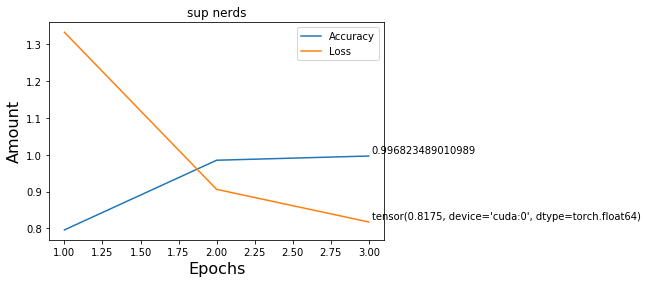

In [59]:
import matplotlib.pyplot as plt
plot_stuff(Hyperparameters.epochs, loss, accuracy)

In [60]:

torch.cuda.empty_cache()
real_results, predicted_ys = batch_wise_evaluate(textual_entailment_model, 
         test_fact_loader,
         Hyperparameters)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [61]:
print(predicted_ys.cpu().shape)
evaluation_summary("textual entailment model", predicted_ys.cpu(), real_results.cpu(), y_fact_test)

torch.Size([6102])
Evaluation for: textual entailment model
Classifier 'textual entailment model' has Acc=0.609 P=0.609 R=0.609 F1=0.608 AUC=0.659
              precision    recall  f1-score   support

         0.0      0.612     0.588     0.599      3041
         1.0      0.606     0.630     0.617      3061

    accuracy                          0.609      6102
   macro avg      0.609     0.609     0.608      6102
weighted avg      0.609     0.609     0.608      6102


Confusion matrix:
 [[1787 1134]
 [1254 1927]]


(0.6087805666583546,
 0.6085842392883666,
 0.6086529006882989,
 0.6084467890788837)

##Baseline Sentence Entailment

In [0]:
class BaselineSentenceEntailment(torch.nn.Module):
  def init_hidden(self):
    hidden_state = Variable(torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size)).cuda()
    cell_state = Variable(torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size)).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()
  
  def __init__(self, hp, word_embeddings):
    super(BaselineSentenceEntailment, self).__init__()
    self.hp = hp
    self.premise_embeddings = torch.nn.Embedding(word_embeddings.size(0), word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.premise_lstm = torch.nn.LSTM(
        input_size = self.premise_embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_embedder = AttentionModel(hp)
    self.hypothesis_embedder = AttentionModel(hp)
    self.linear_final = torch.nn.Linear(hp.lstm_hidden_size*2, hp.num_classes)

  def forward(self, premise, hypothesis):
    #premise/hypothesis embeddinbgs
    embeddings = self.premise_embeddings(premise)
    added_embeddings = self.premise_embeddings(hypothesis[:, :100])
    main_embeddings = torch.cat((embeddings, added_embeddings), 1)
    reshaped_embeddings = main_embeddings.view(self.hp.batch_size, self.hp.max_length, -1)
    processed_premise, hidden_state = self.premise_lstm(main_embeddings, self.hidden_state)

    premise_embedding, premise_attention = self.premise_embedder(processed_premise)
    processed_hypothesis, hidden_state = self.hypothesis_processor(hypothesis, hidden_state)
    hypothesis_embedding, hypothesis_attention = self.hypothesis_embedder(processed_hypothesis)
    combined = premise_embedding * hypothesis_embedding
    avg = torch.sum(combined, 1)/self.hp.attention_hops
    output = torch.sigmoid(self.linear_final(avg))
    return output, hypothesis_attention


In [0]:
class BaselineHyperparameters:
  lstm_hidden_size = 50
  dense_dimension = 30
  attention_hops = 10
  batch_size = BATCH_SIZE
  max_length = MAX_LENGTH
  num_classes = 1
  epochs = 4
  C = 0.3
  is_debug = True

In [64]:
baseline_model = BaselineSentenceEntailment(Hyperparameters, small_gloves).cuda()
cross_entropy_loss = torch.nn.CrossEntropyLoss()
bce_loss = torch.nn.BCELoss()
rms_optimiser = torch.optim.Adam(baseline_model.parameters(), 
                                    lr=0.01)

base_loss, base_accuracy = train(model=baseline_model,
                       train_loader=train_fact_loader,
                       loss_function=bce_loss,
                       optimiser = rms_optimiser,
                       hp = Hyperparameters,
                       using_gradient_clipping=True)

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Train Epoch: 0 [0/23454 (0%)]	Loss: 1.638712
Train Epoch: 0 [2560/23454 (11%)]	Loss: 1.625161
Train Epoch: 0 [5120/23454 (22%)]	Loss: 1.636640
Train Epoch: 0 [7680/23454 (33%)]	Loss: 1.526138
Train Epoch: 0 [10240/23454 (44%)]	Loss: 1.480699
Train Epoch: 0 [12800/23454 (55%)]	Loss: 1.346422
Train Epoch: 0 [15360/23454 (66%)]	Loss: 1.229483
Train Epoch: 0 [17920/23454 (77%)]	Loss: 1.228674
Train Epoch: 0 [20480/23454 (88%)]	Loss: 1.120491
Train Epoch: 0 [23040/23454 (99%)]	Loss: 1.027766
Average loss is: tensor(1.3835, device='cuda:0', dtype=torch.float64)
Accuracy of the model 0.7605597527472527
Running EPOCH: 2
Train Epoch: 1 [0/23454 (0%)]	Loss: 0.981206
Train Epoch: 1 [2560/23454 (11%)]	Loss: 0.954562
Train Epoch: 1 [5120/23454 (22%)]	Loss: 0.910219
Train Epoch: 1 [7680/23454 (33%)]	Loss: 0.785806
Train Epoch: 1 [10240/23454 (44%)]	Loss: 0.719956
Train Epoch: 1 [12800/23454 (55%)]	Loss: 0.633391
Train Epoch: 1 [15360/23454 (66%)]	Loss: 0.618916
Train Epoch: 1 [17920/23454 (77%)]	Los

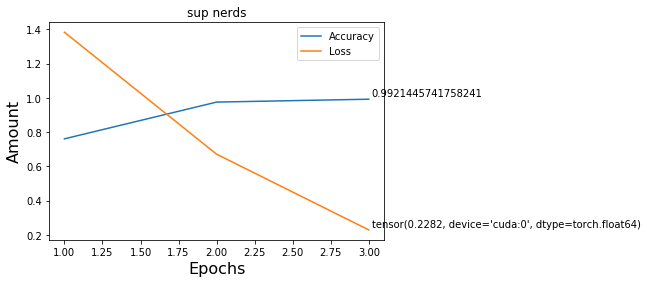

In [65]:
import matplotlib.pyplot as plt
plot_stuff(Hyperparameters.epochs, base_loss, base_accuracy)

In [66]:
torch.cuda.empty_cache()
base_real_results, baseline_predicted_ys = batch_wise_evaluate(baseline_model, 
         test_fact_loader,
         Hyperparameters)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [67]:
evaluation_summary("baseline model", baseline_predicted_ys.cpu(), base_real_results.cpu(), y_fact_test)

Evaluation for: baseline model
Classifier 'baseline model' has Acc=0.640 P=0.641 R=0.641 F1=0.640 AUC=0.666
              precision    recall  f1-score   support

         0.0      0.668     0.614     0.639      3178
         1.0      0.614     0.668     0.640      2924

    accuracy                          0.640      6102
   macro avg      0.641     0.641     0.640      6102
weighted avg      0.642     0.640     0.640      6102


Confusion matrix:
 [[1950  971]
 [1228 1953]]


(0.6407687354554349,
 0.6407570558189468,
 0.6396263520157326,
 0.6396262649090981)

##DECLARE BASELINE :)

In [0]:
class BaselineDeclare(torch.nn.Module):
  def init_hidden(self):
    hidden_state = Variable(torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size)).cuda()
    cell_state = Variable(torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size)).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()
  
  def __init__(self, hp, word_embeddings):
    super(BaselineDeclare, self).__init__()
    self.hp = hp
    self.embeddings_size = word_embeddings.size(1)
    self.premise_embeddings = torch.nn.Embedding(word_embeddings.size(0), word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.premise_lstm = torch.nn.LSTM(
        input_size = self.premise_embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_linear = torch.nn.Linear(2*hp.lstm_hidden_size, 2*hp.lstm_hidden_size)

    self.linear_penultimate = torch.nn.Linear(101, 8)
    #TODO: add third dense layer with relu
    self.linear_final = torch.nn.Linear(8, hp.num_classes)

  def forward(self, premise, hypothesis):
    #get word embeddings for claim, take a mean over the length
    embeddings = self.premise_embeddings(premise)
    mean_embeddings = torch.unsqueeze(torch.sum(embeddings, 1) / self.hp.max_length, 1) #change to accurate size of lenfgth
  

    #get word embeddings for article, slap that onto the much smaller claim
    added_embeddings = self.premise_embeddings(hypothesis[:, :100])
    #TODO: use repeat function to get 100*100
    main_embeddings = torch.cat((mean_embeddings, added_embeddings), 1)
    #shape is 101 * 50

    #attention processing on claim+article combination
    processed_premise, hidden_state = self.premise_lstm(main_embeddings, self.hidden_state)
    attention_weights = softmax(self.premise_linear(processed_premise))#TODO: turn into row vector
    #simple embedding of article alone
    processed_hypothesis, hidden_state = self.hypothesis_processor(hypothesis, hidden_state)
    #matrix multiply of the two
    combined = torch.bmm(processed_hypothesis,attention_weights.transpose(1,2))
    #final processing - another average, and then a relu + sigmoid
    avg = torch.sum(combined, 1)/self.hp.max_length #todo: fix padding

    smaller = F.relu(self.linear_penultimate(avg))
    output = torch.sigmoid(self.linear_final(smaller))
    return output, torch.zeros(self.hp.batch_size, self.hp.attention_hops, self.hp.lstm_hidden_size*2).cuda()

In [99]:
declare_model = BaselineDeclare(Hyperparameters, small_gloves).cuda()
cross_entropy_loss = torch.nn.CrossEntropyLoss()
bce_loss = torch.nn.BCELoss()
rms_optimiser = torch.optim.Adam(declare_model.parameters(), 
                                    lr=0.01)

declare_loss, declare_accuracy = train(model=declare_model,
                       train_loader=train_fact_loader,
                       loss_function=bce_loss,
                       optimiser = rms_optimiser,
                       hp = Hyperparameters,
                       using_gradient_clipping=True)

Running EPOCH: 1
Train Epoch: 0 [0/23454 (0%)]	Loss: 1.641254


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Train Epoch: 0 [2560/23454 (11%)]	Loss: 1.640852


KeyboardInterrupt: ignored

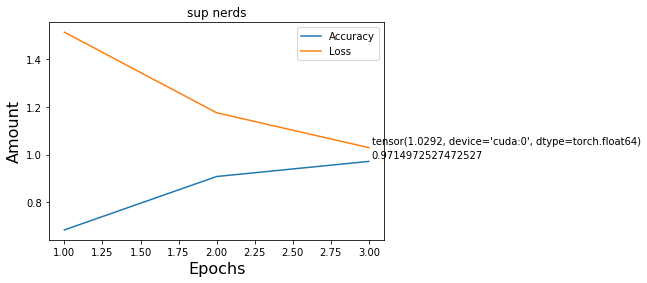

In [97]:
import matplotlib.pyplot as plt
plot_stuff(Hyperparameters.epochs, declare_loss, declare_accuracy)

In [71]:
torch.cuda.empty_cache()
declare_real_results, declare_predicted_ys = batch_wise_evaluate(declare_model, 
         test_fact_loader,
         Hyperparameters)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [72]:
evaluation_summary("declare model", declare_predicted_ys.cpu(), declare_real_results.cpu(), y_fact_test)

Evaluation for: declare model
Classifier 'declare model' has Acc=0.621 P=0.620 R=0.620 F1=0.620 AUC=0.672
              precision    recall  f1-score   support

         0.0      0.598     0.605     0.601      2886
         1.0      0.642     0.635     0.638      3216

    accuracy                          0.621      6102
   macro avg      0.620     0.620     0.620      6102
weighted avg      0.621     0.621     0.621      6102


Confusion matrix:
 [[1746 1175]
 [1140 2041]]


(0.6196813156170221,
 0.6198144542360959,
 0.6206161914126516,
 0.6197274106471953)

##New DeCLARE

In [0]:
class RealDeclare(torch.nn.Module):
  def init_hidden(self):
    hidden_state = Variable(torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size)).cuda()
    cell_state = Variable(torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size)).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()
  
  def __init__(self, hp, word_embeddings):
    super(RealDeclare, self).__init__()
    self.hp = hp
    self.embeddings_size = word_embeddings.size(1)
    self.premise_embeddings = torch.nn.Embedding(word_embeddings.size(0), word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.premise_lstm = torch.nn.LSTM(
        input_size = 2*self.premise_embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_linear = torch.nn.Linear(2*hp.lstm_hidden_size, 1)

    self.linear_penultimate = torch.nn.Linear(101, 8)
    #TODO: add third dense layer with relu
    self.linear_final = torch.nn.Linear(8, hp.num_classes)

  def forward(self, premise, hypothesis):
    #get word embeddings for claim, take a mean over the length
    embeddings = self.premise_embeddings(premise)
    mean_embeddings = torch.unsqueeze(torch.sum(embeddings, 1) / self.hp.max_length, 1) #change to accurate size of lenfgth
  

    #get word embeddings for article, slap that onto the much smaller claim
    added_embeddings = self.premise_embeddings(hypothesis[:, :100])
    #TODO: use repeat function to get 100*100 #DONE!
    main_embeddings = torch.cat((mean_embeddings.repeat(1, 100, 1), added_embeddings), 2)
    #shape is 101 * 50

    #attention processing on claim+article combination
    processed_premise, hidden_state = self.premise_lstm(main_embeddings, self.hidden_state)
    attention_weights = softmax(self.premise_linear(processed_premise))#TODO: turn into row vector
    print(attention_weights.shape)
    #simple embedding of article alone
    processed_hypothesis, hidden_state = self.hypothesis_processor(hypothesis, hidden_state)
    print(processed_hypothesis.shape)
    #matrix multiply of the two
    combined = torch.bmm(processed_hypothesis, attention_weights.transpose(1,2)).transpose(1,2)
    #final processing - another average, and then a relu + sigmoid
    avg = torch.sum(combined, 1)/self.hp.max_length #todo: fix padding
    print(avg.shape)

    smaller = F.relu(self.linear_penultimate(avg))
    output = torch.sigmoid(self.linear_final(smaller))
    return output, torch.zeros(self.hp.batch_size, self.hp.attention_hops, self.hp.lstm_hidden_size*2).cuda()

In [121]:
declare_real_model = RealDeclare(Hyperparameters, small_gloves).cuda()
cross_entropy_loss = torch.nn.CrossEntropyLoss()
bce_loss = torch.nn.BCELoss()
rms_optimiser = torch.optim.Adam(declare_real_model.parameters(), 
                                    lr=0.01)

declare_loss, declare_accuracy = train(model=declare_real_model,
                       train_loader=train_fact_loader,
                       loss_function=bce_loss,
                       optimiser = rms_optimiser,
                       hp = Hyperparameters,
                       using_gradient_clipping=True)

Running EPOCH: 1
torch.Size([256, 100, 1])
torch.Size([256, 500, 100])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


RuntimeError: ignored

In [0]:
import matplotlib.pyplot as plt
plot_stuff(Hyperparameters.epochs, declare_loss, declare_accuracy)